<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>

# Maximum Likelihood Estimation

> According to wikipedia, maximum likelihood estimation ([MLE](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)) can be seen as a special case of maximum a posterior estimaion(MAP) that assumes a **uniform prior distribution** of the parameters, or as a variant of the MAP that ignores the prior and which therefore is unregularized.

## MLE
Suppose there are $n$ samples $x_1$, $x_2$, ..., $x_n$ which are *independent and identically distributed* (i.i.d) drawn from the probability density function $f(\mathbf{x}|\theta)$ with parameters $\theta$.

The joint density function is 

$f(x_1, x_2, ..., x_n\mid\theta)=f(x_1\mid\theta)\times f(x_2\mid\theta)\times ...\times f(x_n\mid\theta)$, 

what we want to know is $\theta$. So considering functions of $\theta$, the same function will be called **likelihood**, 

$\mathcal{L}(\theta;x_1,x_2,...,x_n)=f(x_1, x_2, ..., x_n\mid\theta)=\prod_{i=1}^{n}f(x_i\mid\theta)$

For computing reasons, it's often to use the **log-likehood** form, 

$\ln\mathcal{L}(\theta;x_1,x_2,...,x_n)=\sum_{i=1}^{n}\ln f(x_i\mid\theta)$

The **maximum likelihood estimation** method is to find $\hat\theta$ that maximum the likelihood function $\ln\mathcal{L}(\theta;\bf{x})$.

## MLE of Normal Distribution

For $n$ samples $\bf{x_n}$ of normal distribution $\bf{x_n}\sim \mathcal{N}(\mu,\sigma)$, 
the paramters $\theta=(\mu, \sigma^2)$, the probability density function is 

$$f_{\bf{x}}(x_i)=\frac{1}{\sqrt{2\pi\sigma}}\exp\left({-\frac{(x_i-\mu)^2}{2\sigma ^2}}\right)$$

Thus the likelihood function is 

$$\mathcal{L}(\mu,\sigma^2;x_1,x_2,...,x_n)=(2\pi\sigma ^2)^{-n/2}\exp\left( -\frac{1}{2\sigma ^2}\sum_{i=1}^{n}(x_i-\mu)^2 \right) $$

The log-likelihood function is 

$$\mathcal{l}(\mu,\sigma^2;x_1,x_2,...,x_n)=-\frac{n}{2}\ln(2\pi)-\frac{n}{2}\ln(\sigma^2) -\frac{1}{2\sigma ^2}\sum_{i=1}^{n}(x_i-\mu)^2  $$

To get the maximum likihood, we set the derivative of $\mathcal{l}(\mu,\sigma^2;\bf{x})$ respect to $\mu$ and $\sigma^2$ to 0, to obtain that

$$\hat\mu = \frac{1}{n}\sum_{i=1}^{n}(x_i)$$

$$\hat\sigma^2 = \frac{1}{n} \sum_{i=1}^{n}(x_i-\hat\mu)^2$$


## Example
Assuming we want to know the height distribution of boys of an area. We cannot measure all of the boys, we first sample some boys randomly and compute the distribution to estimate the overall distribution.

We generate 10000 samples randomly from the normar distribution with mean=180, standard deviation=10.

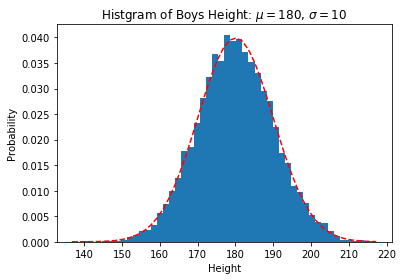

In [70]:
import numpy as np
np.seed = 0
mu, sigma = 180, 10
num_boys = 10000
boys = np.random.normal(mu, sigma, num_boys)

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
num_bins = 50
count, bins, patches = plt.hist(boys, num_bins, normed=True)

y = mlab.normpdf(bins, mu, sigma)
plt.plot(bins, y, 'r--')
plt.xlabel('Height')
plt.ylabel('Probability')
plt.title(r'Histgram of Boys Height: $\mu=180$, $\sigma=10$')
plt.show()

Thus we get the estimate of mean $\mu$ and standard deviation $\sigma$ by maximum likelihood function.

In [72]:
import math
mu_mle = sum(boys) / len(boys)
sigma_mle = math.sqrt(sum(map(lambda x : (x - mu_mle)**2, boys)) / len(boys))
print('Estimated mu=%s, sigma=%s' % (mu_mle, sigma_mle))

Estimated mu=180.042879514, sigma=10.040574940906497


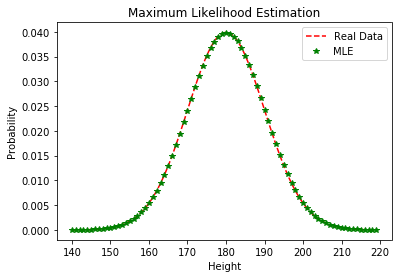

In [73]:
x = np.array(range(140, 220, 1))

y_real = mlab.normpdf(x, mu, sigma)
y_mle = mlab.normpdf(x, mu_mle, sigma_mle)
plt.plot(x, y_real, 'r--', label='Real Data')
plt.plot(x, y_mle, 'g*', label='MLE')
plt.xlabel('Height')
plt.ylabel('Probability')
plt.title(r'Maximum Likelihood Estimation')
plt.legend()
plt.show()